In [1]:
import pandas as pd

In [2]:
surveys_df = pd.read_csv("data/surveys.csv")

In [3]:
a = [1, 2, 3, 4, 5]
a[0], a[-1]
#a[5]
#a[len(a)]

(1, 5)

In [4]:
surveys_df[0:1]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN


In [5]:
surveys_df[:4]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN


In [6]:
surveys_df[:-1]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [7]:
surveys_df[(surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
29082,29083,1,16,1999,21,RM,M,16.0,8.0
29196,29197,2,20,1999,18,RM,M,18.0,8.0
29421,29422,3,15,1999,16,RM,M,15.0,8.0
29903,29904,10,10,1999,4,PP,M,20.0,7.0
29905,29906,10,10,1999,4,PP,M,21.0,4.0


In [8]:
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['plot_id'].unique()

array([ 1, 10,  6, 24,  2, 23, 19, 12, 20, 22,  3,  9, 14, 13, 21,  7, 11,
       15,  4, 16, 17,  8, 18,  5])

In [9]:
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['plot_id'].unique().shape

(24,)

In [10]:
surveys_df[surveys_df["weight"] >= 0]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [11]:
surveys_df[~surveys_df["sex"].isin(['M', 'F'])]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
13,14,7,16,1977,8,DM,NaN,NaN,NaN
18,19,7,16,1977,4,PF,NaN,NaN,NaN
33,34,7,17,1977,17,DM,NaN,NaN,NaN
56,57,7,18,1977,22,DM,NaN,NaN,NaN
76,77,8,19,1977,4,SS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
35527,35528,12,31,2002,13,US,NaN,NaN,NaN
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN


In [12]:
new = surveys_df[~surveys_df['sex'].isin(['M', 'F'])].copy()
print(len(new))

2511


In [13]:
sum(surveys_df['sex'].isnull()) == len(new)

True

<Axes: xlabel='plot_id'>

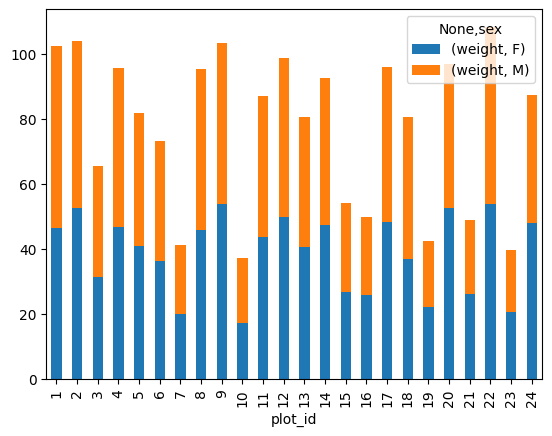

In [14]:
# selection of the data with isin
stack_selection = surveys_df[(surveys_df['sex'].isin(['M', 'F'])) &
              surveys_df["weight"] > 0.][["sex", "weight", "plot_id"]]
# calculate the mean weight for each plot id and sex combination:
stack_selection = stack_selection.groupby(["plot_id", "sex"]).mean().unstack()
# and we can make a stacked bar plot from this:
stack_selection.plot(kind='bar', stacked=True)